In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('spam_ham_dataset.csv', encoding='ISO-8859-1')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5181 entries, 0 to 5180
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5171 non-null   float64
 1   label       5181 non-null   object 
 2   text        5181 non-null   object 
 3   label_num   5181 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 162.0+ KB


In [24]:
df.sample(5)

,Unnamed: 0,label,text,label_num
1321,1714.0,ham,Subject: shell meters for october\ni have conf...,0
2850,4007.0,spam,Subject: indicter quintus trump verse\nhi ulys...,1
3687,1229.0,ham,Subject: re : august 2000 estimated availabili...,0
2669,5052.0,spam,Subject: increase the volume of your ejaculati...,1
4934,3655.0,ham,Subject: fw : customers\n- - - - - original me...,0


In [25]:
#drop some cols
df.drop(columns=["Unnamed: 0",'label'], inplace=True)

In [26]:
df.sample(5)

,text,label_num
2346,Subject: arturo hydrate eyesight humorous depa...,1
4922,Subject: hp psc 1315 all - in - one @ $ 69 . 0...,1
2698,Subject: june 1 st\n- - - - - - - - - - - - - ...,0
3358,Subject: revision # 3 - same day change - hpl ...,0
1472,Subject: meter 984229 - roos common point - tr...,0


In [27]:
print(df.isna().sum())

text         0
label_num    0
dtype: int64


In [28]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [29]:
#check for duplicates
df.duplicated().sum()

179

In [30]:
df = df.drop_duplicates()

In [31]:
df.shape

(5002, 2)

EDA(Exploratory Data Analysis)

In [32]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [33]:
df['label_num'].value_counts()

label_num
0    3540
1    1462
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x248413027d0>,
 [Text(-0.6679463985856953, 0.8739837576387789, 'ham'),
  Text(0.6679464804139572, -0.87398369510112, 'spam')],
 [Text(-0.364334399228561, 0.4767184132575157, '70.77'),
  Text(0.3643344438621584, -0.47671837914606535, '29.23')])

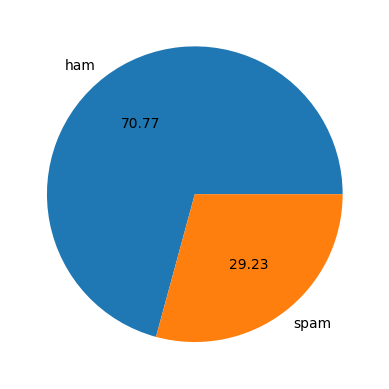

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['label_num'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

data is imbalanced

In [35]:
import nltk

In [36]:
nltk.download('punkt') #unsupervised training model which can be ttrained on data that hasnt been tageed with information identifying its characteristics,properties or categories(unlabeled data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fenuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
#getting number of characters in every email message and creating a column call num characters 
df['num_characters']=df['text'].apply(len)

In [38]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
# Number of Sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df['avg_word_length'] = df['num_characters'] / df['num_words']

In [41]:
df['sentence_complexity'] = df['num_words'] / df['num_sentences']

In [42]:
df['num_special_chars'] = df['text'].apply(lambda x: sum(not c.isalnum() and not c.isspace() for c in x))

In [43]:
df['capital_ratio'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper())) / df['num_characters']

In [44]:
df.head()

,text,label_num,num_characters,num_words,num_sentences,avg_word_length,sentence_complexity,num_special_chars,capital_ratio
0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68,3,4.735294,22.666667,15,0.003106
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24,3,3.958333,8.000000,8,0.010526
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551,24,4.564428,22.958333,82,0.000398
3,"Subject: photoshop , windows , office . cheap ...",1,404,49,3,8.244898,16.333333,5,0.002475
4,Subject: re : indian springs\nthis deal is to ...,0,332,71,3,4.676056,23.666667,7,0.003012


In [45]:
df[['num_characters','num_words','num_sentences','avg_word_length','sentence_complexity','num_special_chars','capital_ratio']].describe()

,num_characters,num_words,num_sentences,avg_word_length,sentence_complexity,num_special_chars,capital_ratio
count,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000
mean,1050.031387,233.373651,13.368852,4.507530,21.471877,65.669132,0.003687
std,1524.594246,340.492554,27.938504,0.870253,36.033570,135.352662,0.006946
min,10.000000,2.000000,1.000000,1.342558,1.287157,1.000000,0.000031
25%,250.000000,54.000000,4.000000,3.956007,10.127841,10.000000,0.000810
50%,544.000000,125.000000,7.000000,4.418315,15.902778,27.000000,0.001842
75%,1237.250000,288.000000,15.000000,4.899747,24.248980,80.000000,0.004016
max,31860.000000,8863.000000,1204.000000,20.434307,1793.000000,5295.000000,0.266655


In [46]:
df[df['label_num'] == 0][['num_characters','num_words','num_sentences','avg_word_length','sentence_complexity','num_special_chars','capital_ratio']].describe()

,num_characters,num_words,num_sentences,avg_word_length,sentence_complexity,num_special_chars,capital_ratio
count,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000
mean,976.636158,230.093785,11.641243,4.299541,22.417287,71.626271,0.003627
std,1381.141384,336.723708,25.302010,0.653821,36.638442,146.766164,0.007037
min,17.000000,3.000000,1.000000,2.660000,1.625000,1.000000,0.000031
25%,234.000000,53.000000,4.000000,3.851312,10.995455,10.000000,0.000815
50%,527.500000,127.000000,6.500000,4.249517,17.184659,29.000000,0.001899
75%,1230.000000,298.000000,13.000000,4.700159,25.916193,89.000000,0.004274
max,31860.000000,8863.000000,1204.000000,20.434307,1793.000000,5295.000000,0.266655


In [47]:
df[df['label_num'] == 1][['num_characters','num_words','num_sentences','avg_word_length','sentence_complexity','num_special_chars','capital_ratio']].describe()

,num_characters,num_words,num_sentences,avg_word_length,sentence_complexity,num_special_chars,capital_ratio
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.00000,1462.000000
mean,1227.746238,241.315321,17.551984,5.011143,19.182719,51.24487,0.003831
std,1814.119546,349.439381,33.111447,1.094652,34.429918,101.18761,0.006721
min,10.000000,2.000000,1.000000,1.342558,1.287157,1.00000,0.000046
25%,299.000000,60.000000,4.000000,4.400515,9.000000,11.00000,0.000786
50%,577.500000,119.500000,9.000000,4.828007,13.159664,25.00000,0.001732
75%,1272.750000,252.750000,19.000000,5.339261,19.750000,50.75000,0.003344
max,21749.000000,3963.000000,693.000000,11.482353,630.000000,1630.00000,0.100000


In [48]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

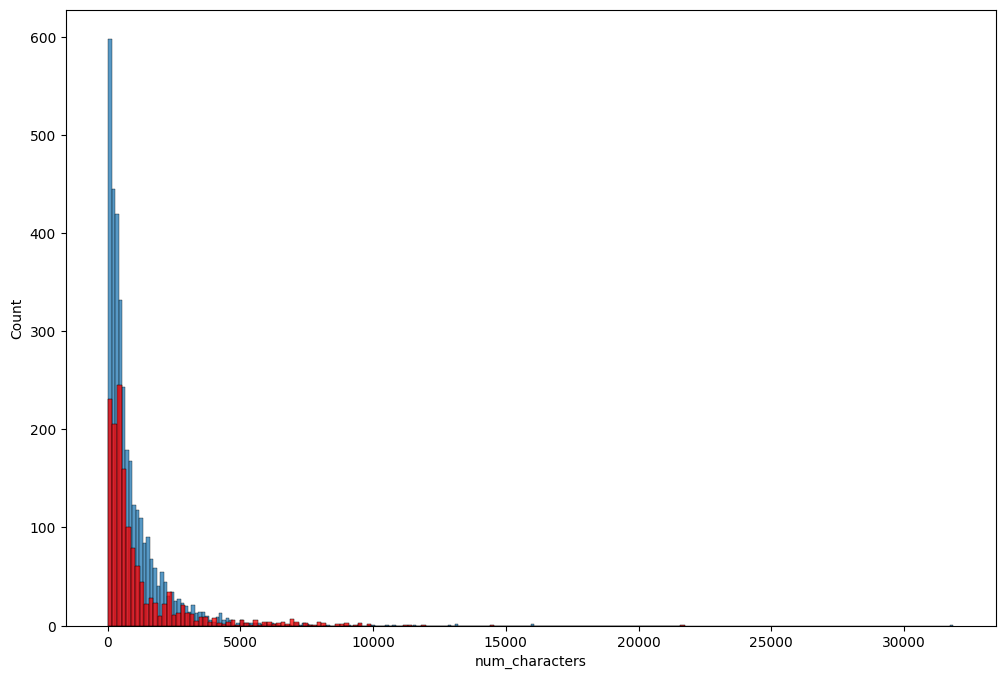

In [49]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label_num'] == 0]['num_characters'])
sns.histplot(df[df['label_num'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

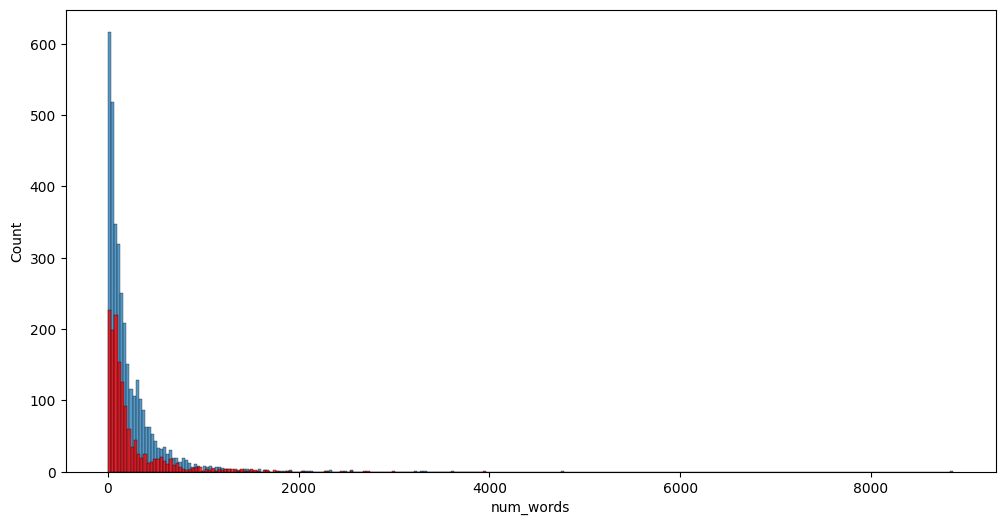

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_num'] == 0]['num_words'])
sns.histplot(df[df['label_num'] == 1]['num_words'],color='red')

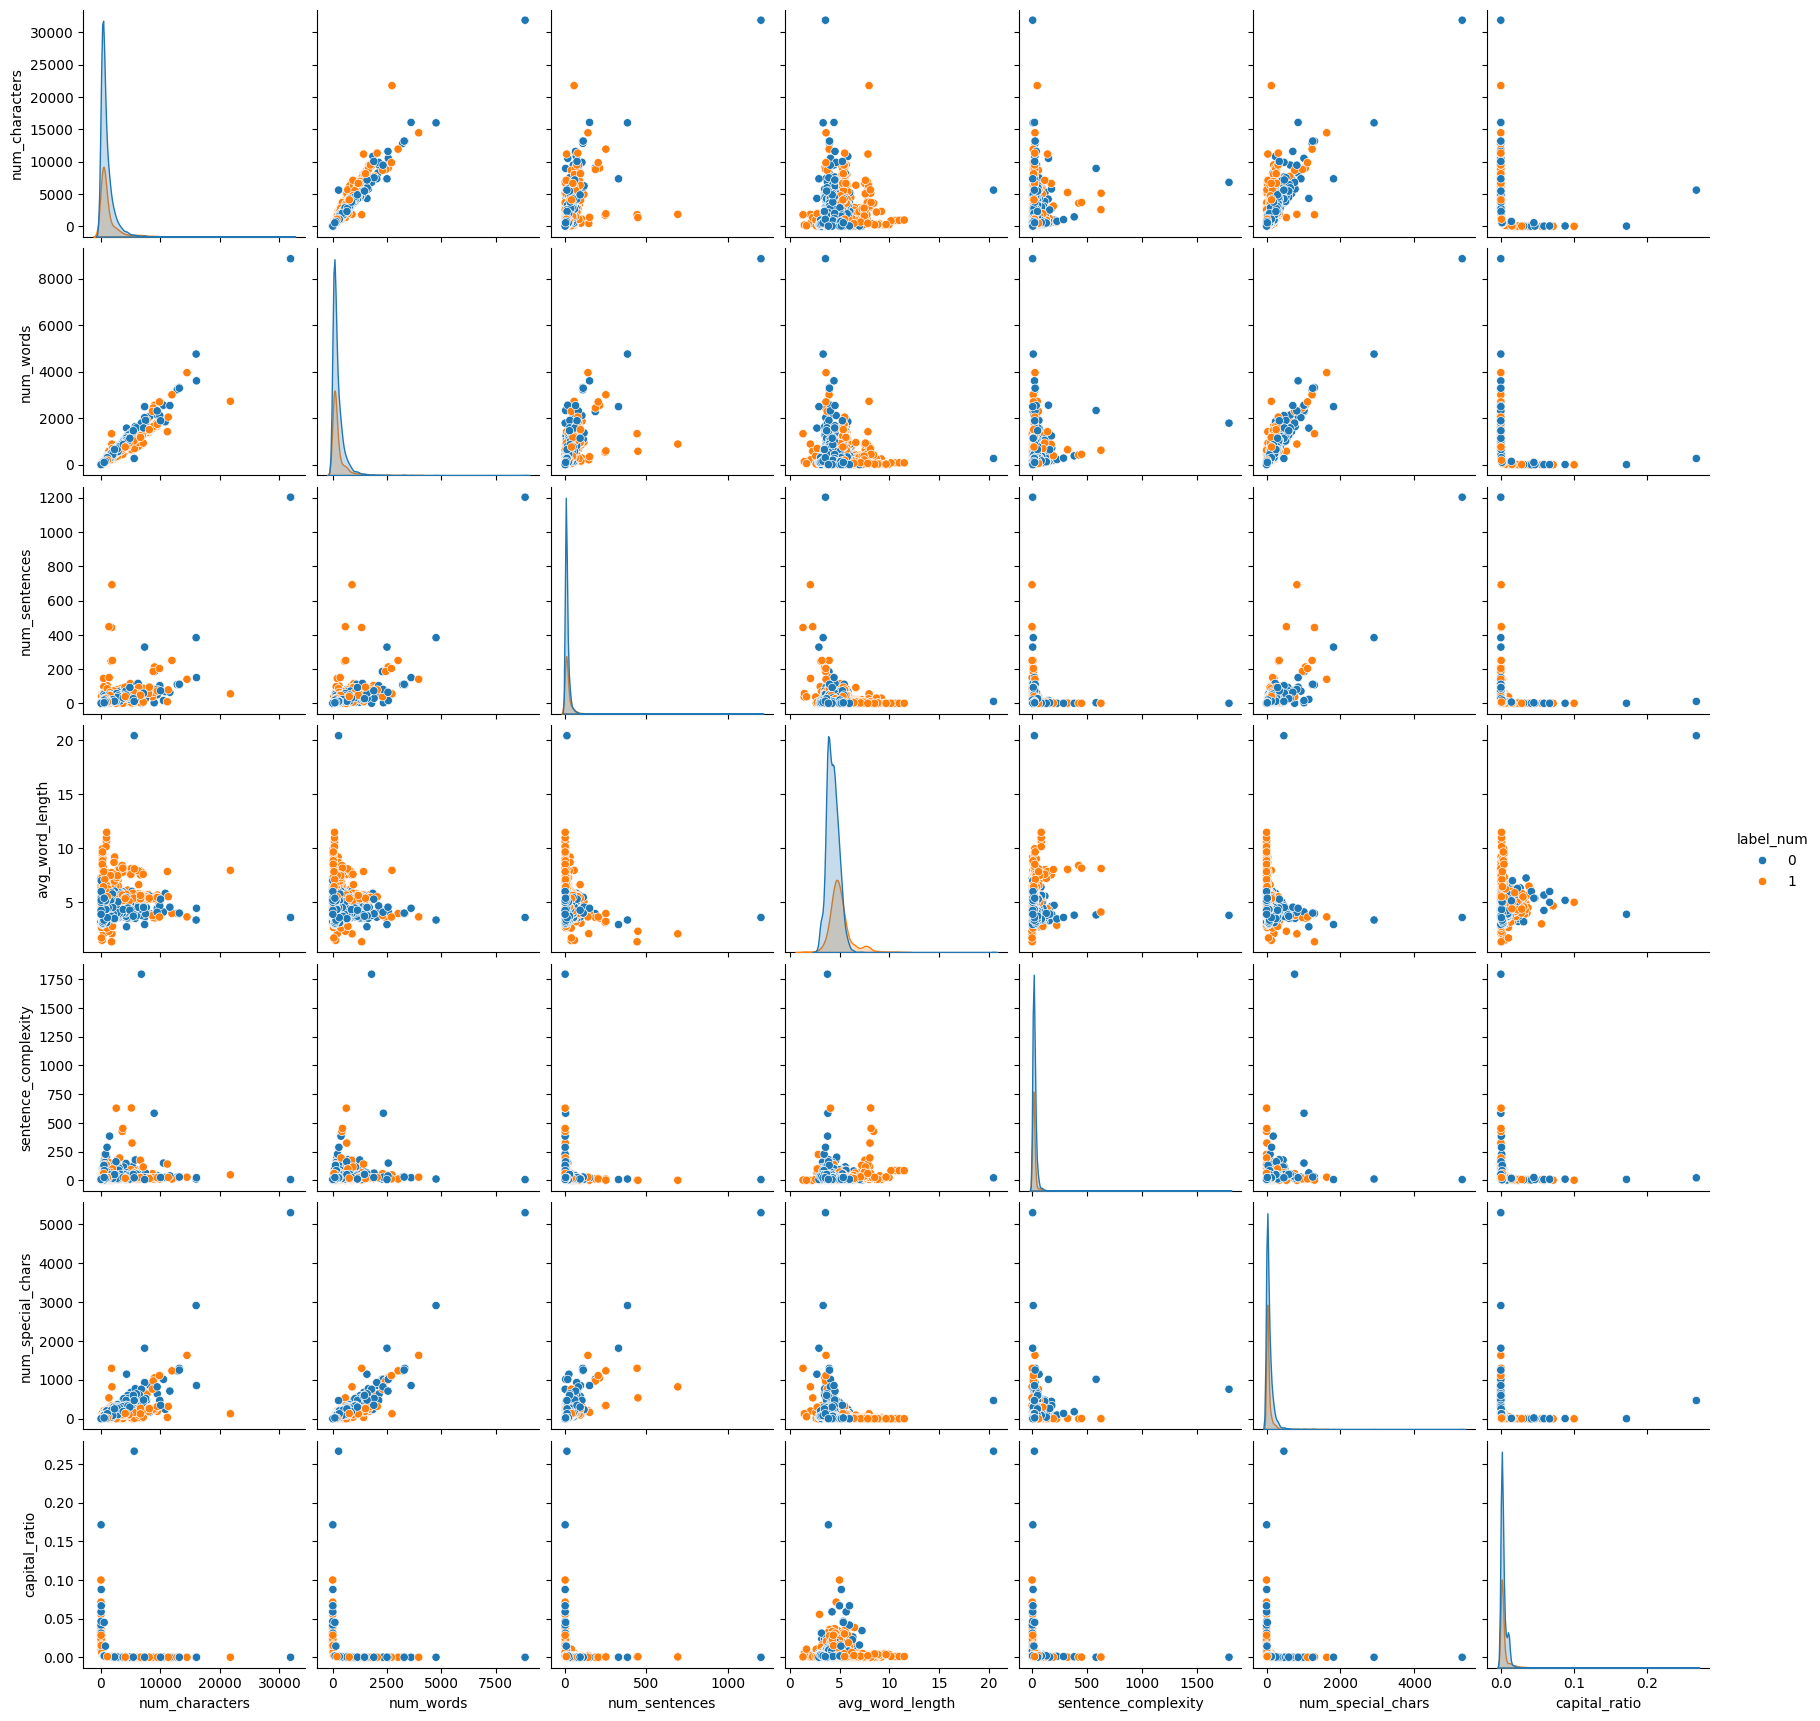

In [51]:
sns.pairplot(df,hue='label_num')

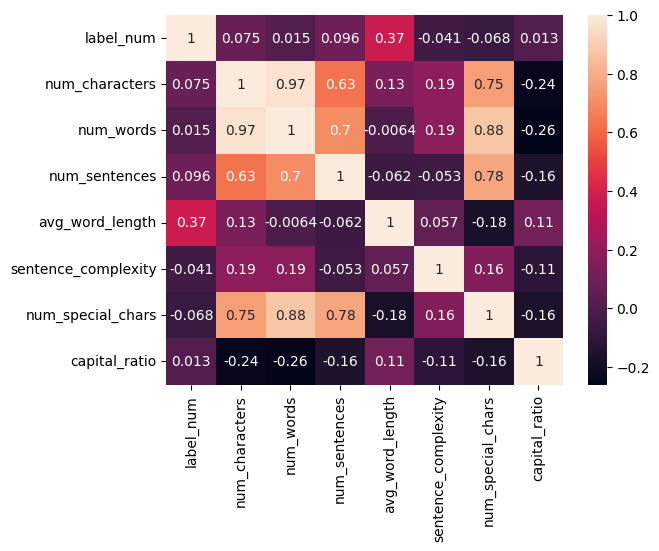

In [52]:
import numpy as np
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Compute the correlation matrix
corr_matrix = numeric_df.corr()
#Plotting the sns(seaborne) heatmap
sns.heatmap(corr_matrix,annot=True)
plt.show()


Data Preprocessing
1. LowerCase
2.Tokenization
3. Removing Special characters
4.Removing stopwords and punctuations
5.Stemming

In [53]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fenuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fenuk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import string 



In [55]:
#created a method to transform the email text
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text =y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(lemmatizer.lemmatize(i))
            
    return " ".join(y)

In [56]:
transform_text("Go until jurong point,crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat....")

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [57]:
df['transformed_text'] = df['text'].apply(transform_text)

In [58]:
df.head()

,text,label_num,num_characters,num_words,num_sentences,avg_word_length,sentence_complexity,num_special_chars,capital_ratio,transformed_text
0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68,3,4.735294,22.666667,15,0.003106,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24,3,3.958333,8.000000,8,0.010526,subject hpl nom january 9 2001 see attached fi...
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551,24,4.564428,22.958333,82,0.000398,subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",1,404,49,3,8.244898,16.333333,5,0.002475,subject photoshop window office cheap main tre...
4,Subject: re : indian springs\nthis deal is to ...,0,332,71,3,4.676056,23.666667,7,0.003012,subject indian spring deal book teco pvr reven...


In [59]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [60]:
spam_wc = wc.generate(df[df['label_num'] == 1]['transformed_text'].str.cat(sep=" "))

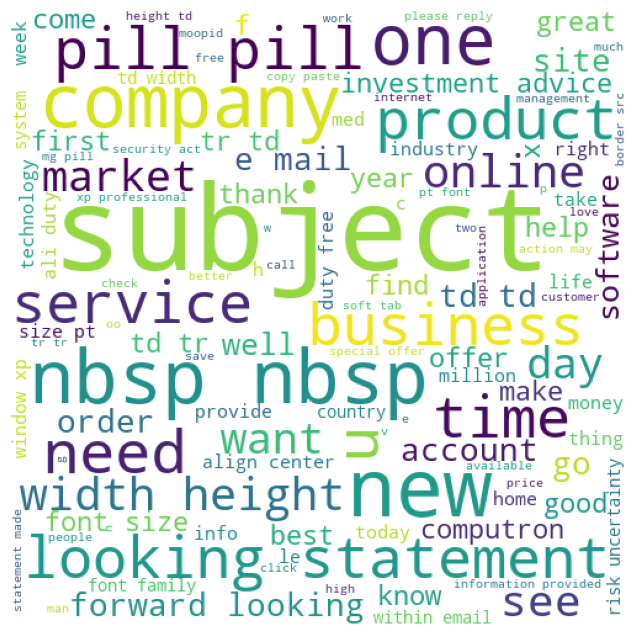

In [61]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

In [62]:
ham_wc = wc.generate(df[df['label_num'] == 0]['transformed_text'].str.cat(sep=" "))

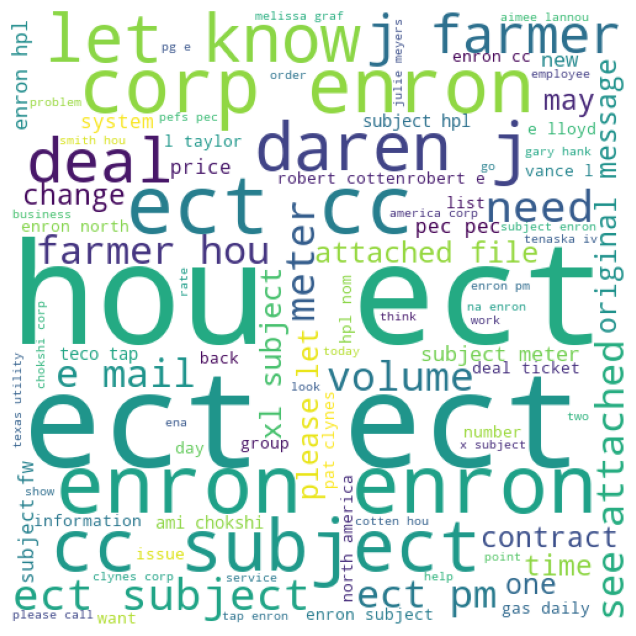

In [63]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

Goal: Collect all words from spam messages into a single list.

Process:

Initialize an empty list to store the words.

Filter the DataFrame to include only spam messages and extract their text.

Loop through each spam message, splitting the message into words.

Append each word to the spam_corpus list.

Outcome: After running this code, spam_corpus will contain all the words from the spam messages, enabling further analysis such as frequency counting, word cloud generation, etc.

In [64]:
spam_corpus = []
for msg in df[df['label_num'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [65]:
len(spam_corpus)

196592

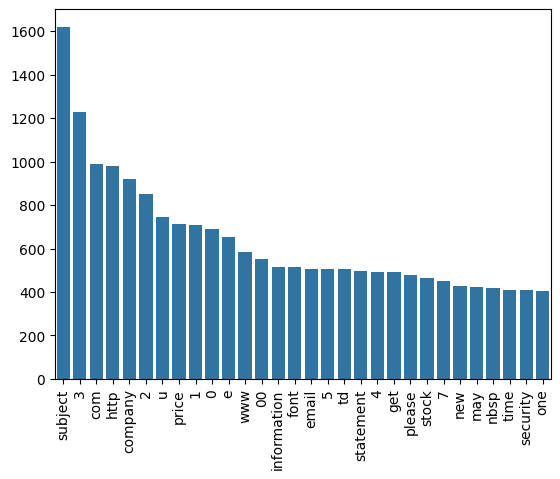

In [66]:
from collections import Counter
sns.barplot(x=[word for word, count in Counter(spam_corpus).most_common(30)], y=[count for word, count in Counter(spam_corpus).most_common(30)])
plt.xticks(rotation='vertical')
plt.show()



In [67]:
ham_corpus = []
for msg in df[df['label_num'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

380739

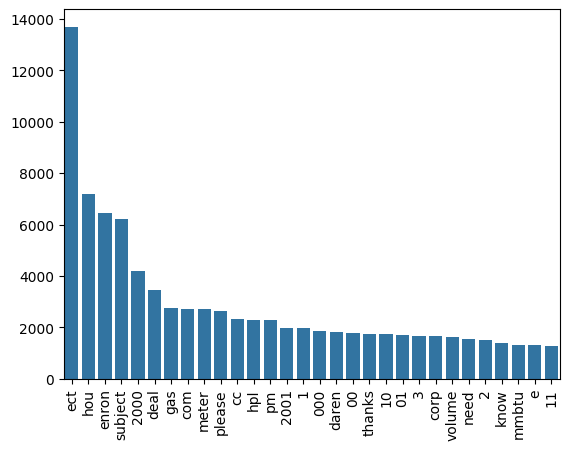

In [69]:
from collections import Counter
sns.barplot(x=[word for word, count in Counter(ham_corpus).most_common(30)], y=[count for word, count in Counter(ham_corpus).most_common(30)])
plt.xticks(rotation='vertical')
plt.show()



FEATURE ENGINEERING

TEXT VECTORIZATION

USING BAG OF WORDS

In [70]:
df.head()

,text,label_num,num_characters,num_words,num_sentences,avg_word_length,sentence_complexity,num_special_chars,capital_ratio,transformed_text
0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68,3,4.735294,22.666667,15,0.003106,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24,3,3.958333,8.000000,8,0.010526,subject hpl nom january 9 2001 see attached fi...
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551,24,4.564428,22.958333,82,0.000398,subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",1,404,49,3,8.244898,16.333333,5,0.002475,subject photoshop window office cheap main tre...
4,Subject: re : indian springs\nthis deal is to ...,0,332,71,3,4.676056,23.666667,7,0.003012,subject indian spring deal book teco pvr reven...


MODEL BUILDING
A vectorizer in the context of natural language processing (NLP) is a tool that converts text data into numerical format that can be used by machine learning algorithms. 

fit: Learns the vocabulary dictionary of all tokens in the provided text.

transform: Transforms the text data into a numerical matrix based on the learned vocabulary.

fit_transform: Fits the vocabulary dictionary and transforms the text data into a numerical matrix.

the result is a sparse matrix representation of the text data.

toarray(): Converts the sparse matrix to a dense NumPy array.

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)

In [72]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [73]:
X.shape

(5002, 2500)

In [74]:
X.shape

(5002, 2500)

Checking variance of X across documents

In [75]:
mean = np.mean(X,axis=0)
squared_mean = np.multiply(X,X).mean(axis=0)
variance = squared_mean-np.multiply(mean,mean)
lowest_var =np.min(variance)
highest_var =np.max(variance)
mean_var =np.mean(variance)

print('Variance:', np.array(variance).flatten())
print('Lowest Variance:', lowest_var)
print('Highest Variance:',highest_var)
print('Mean Variance:', mean_var)

Variance: [3.73135645e-03 6.16475056e-03 1.13063118e-05 ... 5.78470205e-05
 2.91602422e-04 2.57994962e-05]
Lowest Variance: 1.554629857670675e-06
Highest Variance: 0.022912543238642176
Mean Variance: 0.00038549159593796273


In [76]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a threshold value
selector_vt = VarianceThreshold(threshold=0.0002855)  # Adjust threshold as needed

# Fit and transform the data
X = selector_vt.fit_transform(X)

In [77]:
feature_names = tfidf.get_feature_names_out()
selected_indices = selector_vt.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_indices]
print('Features retained:', len(selected_features),)
print('Selected features:', selected_features)

Features retained: 990
Selected features: ['00', '000', '01', '012', '02', '03', '04', '0435', '05', '06', '07', '08', '09', '10', '100', '11', '110', '12', '120', '13', '14', '1428', '15', '16', '17', '18', '19', '1999', '20', '200', '2000', '2001', '2003', '2004', '2005', '201', '202', '21', '213', '214', '215', '22', '23', '24', '25', '250', '26', '27', '28', '281', '29', '30', '300', '31', '32', '35', '36', '384258', '40', '405', '42', '45', '463', '49', '50', '500', '5192', '60', '65', '70', '700', '713', '75', '750', '80', '800', '830', '90', '92', '9497', '95', '97', '98', '99', 'access', 'account', 'accounting', 'action', 'activity', 'acton', 'actual', 'actuals', 'add', 'added', 'additional', 'address', 'adjusted', 'adjustment', 'adobe', 'adult', 'advise', 'aep', 'aepin', 'affordable', 'afternoon', 'age', 'agree', 'agreement', 'aimee', 'al', 'allen', 'allocation', 'already', 'also', 'alt', 'always', 'amazon', 'ami', 'amount', 'analyst', 'anderson', 'anything', 'aol', 'apache', 

In [78]:
X.shape

(5002, 990)

In [79]:
X.shape

(5002, 990)

In [80]:
from sklearn.feature_selection import SelectKBest, chi2

# target variable:y
y = df['label_num']

# Apply Chi-Square to select top k features
k = 700 # Number of top features to select
selector_cs = SelectKBest(chi2, k=k)
X = selector_cs.fit_transform(X, y)


In [81]:
feature_names = tfidf.get_feature_names_out()
selected_indices = selector_cs.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_indices]
print('Features retained:', len(selected_features),)
print('Selected features:', selected_features)

Features retained: 700
Selected features: ['00', '000', '000000', '001', '01', '012', '02', '03', '0310041', '04', '0424040', '0435', '0439', '05', '06', '08', '098', '0986725', '100', '1000', '1007', '101', '1012', '105', '11', '12', '120', '1200', '1226030', '124', '1266', '129', '138', '14', '1428', '15', '16', '161', '1618', '17', '18', '180', '19', '1933', '20', '200', '2001', '202', '213', '215', '229', '23', '24', '249', '25', '250', '26', '27', '270', '28', '285', '300', '31', '311', '32', '33', '34', '34342', '35', '38', '384258', '39', '40', '400', '405', '41', '4176', '4179', '42', '43', '44', '45', '463', '47', '50', '500', '51', '552', '57', '5848', '59', '60', '600', '63', '646', '65', '6757', '68', '6934', '70', '71', '713', '72', '73', '75', '77002', '79', '8018', '802', '830', '84', '8834464', '89', '90', '92', '94', '9497', '96', '97', '98', '984132', '99', 'abdv', 'ability', 'able', 'ac', 'accept', 'access', 'accessory', 'account', 'accountant', 'accuracy', 'accurate

In [82]:
X.shape

(5002, 700)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler_s = StandardScaler(with_mean=False) #since X is sparse
X = scaler_s.fit_transform(X)

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Reduce to 10 components If you have fewer than 100 features, you must reduce n_components to a number less than or equal to the number of features.
X = pca.fit_transform(X)

print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative explained variance:', np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio: [0.01778963 0.01397638 0.01119473 0.00923499 0.00863441 0.00808083
 0.00747078 0.00714302 0.00703821 0.00637835 0.00596786 0.00526542
 0.00518926 0.00505317 0.00492891 0.0048834  0.00459139 0.0045452
 0.00451815 0.00444373 0.00434208 0.00427757 0.00419593 0.00416064
 0.00409628 0.00396032 0.00389389 0.00379558 0.00375347 0.00370443
 0.00365373 0.00359766 0.00348818 0.00346172 0.00339668 0.00336619
 0.00331056 0.0032603  0.00320436 0.00320168 0.00316673 0.00311095
 0.00309746 0.00307022 0.00303431 0.00302052 0.00298463 0.00297265
 0.00295036 0.00293306 0.00291293 0.0029051  0.00285565 0.00282777
 0.00282433 0.00282274 0.00280108 0.00279486 0.00275167 0.00273029
 0.00272601 0.00270515 0.00266936 0.00265746 0.00264631 0.00262462
 0.00259924 0.00257615 0.00255438 0.00254872 0.00253785 0.00251507
 0.00250939 0.00249892 0.0024875  0.00247192 0.00246226 0.00244984
 0.00243921 0.00242413 0.00241926 0.00240702 0.00240025 0.00239726
 0.00237056 0.00236816 0.00235706 0.0

In [85]:
X.shape

(5002, 562)

In [86]:
X

array([[ 0.70161857, -1.31860755,  0.18700524, ...,  0.58422463,
         0.89679313,  0.24425979],
       [ 1.18564013, -0.13354816,  3.86474486, ...,  0.1412112 ,
        -1.07936871,  0.52553954],
       [-3.6073942 ,  1.68578225, -1.98005295, ...,  0.72361771,
         0.3851331 , -0.59534886],
       ...,
       [-2.30280883,  0.81341642,  0.11989089, ...,  0.53547838,
        -0.90195612,  0.54173683],
       [-0.49600111,  0.11950079,  0.98503973, ..., -0.04960678,
         0.31442034,  0.16984178],
       [-4.16725587,  1.03242023, -1.87830822, ...,  0.21246426,
         1.27106402, -0.84542392]])

In [87]:
y = df['label_num'].values

In [88]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
from sklearn.model_selection import train_test_split

X_train: The training set of features.

X_test: The testing set of features.

y_train: The training set of labels.

y_test: The testing set of labels.

Perform stratiified split for:  Balanced Representation, Consistent Training and  Reliable Evaluation

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [91]:
# Print the shapes of the split arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4001, 562)
X_test shape: (1001, 562)
y_train shape: (4001,)
y_test shape: (1001,)


Accuracy: Indicates the proportion of correctly classified instances. It’s calculated as:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Confusion Matrix: Shows the count of true positives, true negatives, false positives, and false negatives, structured as:

[True Negatives False Positives False Negatives True Positives]

[True Negatives False Negatives False Positives True Positives]

Precision: Measures the accuracy of the positive predictions and is calculated as:

Precision  = TP / (TP + FP)

Check class distribution before and after applying smote

In [92]:
from collections import Counter

print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({0: 2832, 1: 1169})


In [93]:
from imblearn.over_sampling import SMOTE

# Handling data imbalances
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [94]:
print("Resampled class distribution:", Counter(y_train))

Resampled class distribution: Counter({1: 2832, 0: 2832})


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

Each of these classifiers is a machine learning algorithm with its own method for making predictions. Here’s a simple explanation of what each classifier does:

 1. SVC (Support Vector Classifier)
- `SVC(kernel='sigmoid', gamma=1.0)`
- What It Does: SVC tries to find the best boundary (hyperplane) that separates different classes of data. The `sigmoid` kernel maps the data into a higher-dimensional space to make it easier to find a separation.
- Use Case: Useful for both linear and non-linear classification problems. Often used in text classification and image recognition.

 2. KNeighborsClassifier
- `knc = KNeighborsClassifier()`
- What It Does: This classifier looks at the `k` nearest neighbors of a data point and assigns it to the class most common among them.
- Use Case: Simple and intuitive method often used for classification and regression tasks, especially when the data is not too large.

 3. MultinomialNB (Multinomial Naive Bayes)
- `mnb = MultinomialNB()`
- What It Does: This classifier uses Bayes' theorem and works particularly well with discrete features (e.g., word counts in text classification).
- Use Case: Commonly used for text classification problems like spam detection or sentiment analysis.

 4. DecisionTreeClassifier
- `dtc = DecisionTreeClassifier()`
- What It Does: It creates a tree-like model of decisions based on the features of the data. Each node represents a decision based on a feature, and each branch represents the outcome of that decision.
- Use Case: Useful for both classification and regression tasks, easy to understand and visualize.

 5. LogisticRegression
- `lrc = LogisticRegression(solver='liblinear', penalty='l1')`
- What It Does: This classifier models the probability of the default class (usually the binary outcome) using a logistic function. The `l1` penalty adds a regularization term to avoid overfitting.
- Use Case: Widely used for binary classification problems such as predicting whether an email is spam or not.

 6. RandomForestClassifier
- `rfc = RandomForestClassifier(n_estimators=50, random_state=2)`
- What It Does: This classifier creates a forest of decision trees and merges them to get a more accurate and stable prediction.
- Use Case: Effective on a wide range of classification and regression tasks, robust to overfitting.

 7. AdaBoostClassifier
- `abc = AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')`
- What It Does: It combines multiple weak classifiers to create a strong classifier by focusing on the errors of the previous classifiers.
- Use Case: Good for improving the accuracy of weak models, often used in combination with other classifiers.

 8. BaggingClassifier
- `bc = BaggingClassifier(n_estimators=50, random_state=2)`
- What It Does: This classifier builds multiple instances of a specified classifier on random subsets of the data and then averages the results.
- Use Case: Useful for reducing variance and improving the stability of the model.

 9. ExtraTreesClassifier
- `etc = ExtraTreesClassifier(n_estimators=50, random_state=2)`
- What It Does: Similar to RandomForest, but it uses the whole dataset and random splits to build each tree, which usually leads to more randomness and less overfitting.
- Use Case: Effective for classification and regression tasks, offers more randomness compared to RandomForest.

 10. GradientBoostingClassifier
- `gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)`
- What It Does: Builds an ensemble of weak prediction models (usually decision trees) in a stage-wise manner and optimizes the loss function.
- Use Case: Often used for classification and regression problems, known for its high predictive performance.

These classifiers offer a variety of approaches for tackling classification problems, each with its own strengths and typical use cases. Depending on the problem at hand, some classifiers may perform better than others, and ensemble methods like the Voting Classifier can leverage the strengths of multiple classifiers.

In [96]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2, class_weight='balanced')
abc = AdaBoostClassifier(n_estimators=50,random_state=2,algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [97]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    #'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT':gbdt,
}

Scaling classifiers scv, kn and lr due to sensitivity to the scale of the input features

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Initialize an empty dictionary to store pipelines
pipelines = {}

# Define and fit pipelines
for name, clf in clfs.items():
    if name in ['SVC', 'KN', 'LR']:  # Algorithms that require scaling
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer()),  # Convert text to numerical features
            ('scaler', StandardScaler(with_mean=False)),  # Scale features
            ('classifier', clf)  # Add the classifier
        ])
    else:
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer()),  # Convert text to numerical features
            ('classifier', clf)  # Add the classifier
        ])
    
    # Store the pipeline
    pipelines[name] = pipeline



In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='macro',zero_division=0)
    
    return accuracy,precision

In [100]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.7502497502497503, 0.724078839869281)

In [101]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print(f"For {name}")
        print(f"Accuracy - {current_accuracy}")
        print(f"Precision - {current_precision}")
        
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
    except Exception as e:
        print(f"Error training {name}: {e}")


For SVC
Accuracy - 0.7502497502497503
Precision - 0.724078839869281
For KN
Accuracy - 0.8211788211788211
Precision - 0.8076980190072561
For DT
Accuracy - 0.9170829170829171
Precision - 0.8984362320639254
For LR
Accuracy - 0.9530469530469531
Precision - 0.9381313131313131
For RF
Accuracy - 0.9560439560439561
Precision - 0.9380428807036834
For AdaBoost
Accuracy - 0.9500499500499501
Precision - 0.9307058640876006
For BgC
Accuracy - 0.9430569430569431
Precision - 0.9224975837481992
For ETC
Accuracy - 0.9440559440559441
Precision - 0.9372429814155793
For GBDT
Accuracy - 0.9470529470529471
Precision - 0.9248120300751879


In [102]:
import pandas as pd
from sklearn.metrics import classification_report

# True labels
y_true = y_test  # Replace with your actual test labels

# Initialize a list to store results
results = []

# Iterate over each model
for model_name, model in clfs.items():
    y_pred = model.predict(X_test)  # Replace with your model's predictions
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True, zero_division=0)
    
    # Extract relevant metrics
    results.append({
        'Model': model_name,
        'Precision Class 0': report['Class 0']['precision'],
        'Recall Class 0': report['Class 0']['recall'],
        'F1-Score Class 0': report['Class 0']['f1-score'],
        'Precision Class 1': report['Class 1']['precision'],
        'Recall Class 1': report['Class 1']['recall'],
        'F1-Score Class 1': report['Class 1']['f1-score'],
        'Overall Accuracy': report['accuracy']
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


      Model  Precision Class 0  Recall Class 0  F1-Score Class 0  \
0       SVC           0.897569        0.730226          0.805296   
1        KN           0.992551        0.752825          0.856225   
2        DT           0.944523        0.937853          0.941176   
3        LR           0.976912        0.956215          0.966453   
4        RF           0.988235        0.949153          0.968300   
5  AdaBoost           0.985251        0.943503          0.963925   
6       BgC           0.980798        0.937853          0.958845   
7       ETC           0.952778        0.968927          0.960784   
8      GBDT           0.992481        0.932203          0.961398   

   Precision Class 1  Recall Class 1  F1-Score Class 1  Overall Accuracy  
0           0.550588        0.798635          0.651811          0.750250  
1           0.622845        0.986348          0.763540          0.821179  
2           0.852349        0.866894          0.859560          0.917083  
3           0.89935

In [103]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [104]:
performance_df

,Algorithm,Accuracy,Precision
3,LR,0.953047,0.938131
4,RF,0.956044,0.938043
7,ETC,0.944056,0.937243
5,AdaBoost,0.950050,0.930706
8,GBDT,0.947053,0.924812
6,BgC,0.943057,0.922498
2,DT,0.917083,0.898436
1,KN,0.821179,0.807698
0,SVC,0.750250,0.724079


In [105]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [106]:
performance_df1

,Algorithm,variable,value
0,LR,Accuracy,0.953047
1,RF,Accuracy,0.956044
2,ETC,Accuracy,0.944056
3,AdaBoost,Accuracy,0.950050
4,GBDT,Accuracy,0.947053
5,BgC,Accuracy,0.943057
6,DT,Accuracy,0.917083
7,KN,Accuracy,0.821179
8,SVC,Accuracy,0.750250
9,LR,Precision,0.938131


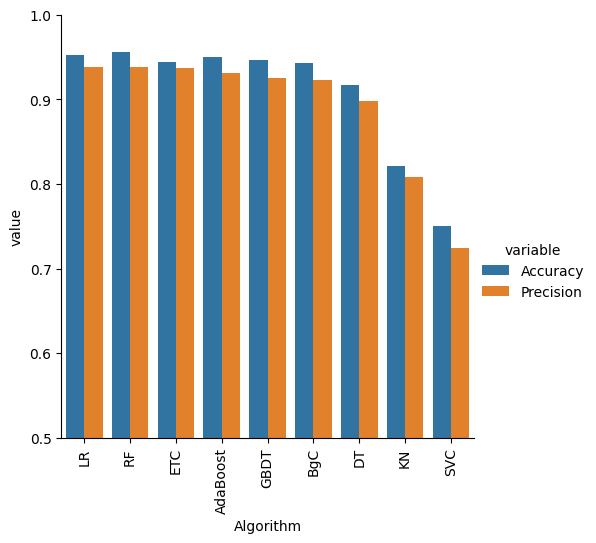

In [107]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data = performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

 #model improve
 
 #1. Change the max_features parameter of Tfidf

In [108]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_576':accuracy_scores,'Precision_max_ft_576':precision_scores})

In [109]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [110]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_576,Precision_max_ft_576
0,LR,0.953047,0.938131,0.953047,0.938131
1,RF,0.956044,0.938043,0.956044,0.938043
2,ETC,0.944056,0.937243,0.944056,0.937243
3,AdaBoost,0.950050,0.930706,0.950050,0.930706
4,GBDT,0.947053,0.924812,0.947053,0.924812
5,BgC,0.943057,0.922498,0.943057,0.922498
6,DT,0.917083,0.898436,0.917083,0.898436
7,KN,0.821179,0.807698,0.821179,0.807698
8,SVC,0.750250,0.724079,0.750250,0.724079


A Voting Classifier is a type of machine learning model that combines the predictions of multiple different models to make a final prediction. Think of it like a group of experts who each give their opinion on a decision, and the final decision is made based on what most experts agree on. Here's a simple breakdown:

How It Works
Multiple Models:
Imagine you have three different models (experts) that are each good at making predictions in different ways.
For example, one model might be good at recognizing certain patterns, another at handling numbers, and a third at understanding relationships.

Making Predictions:
Each model looks at the same data and makes its own prediction.
For instance, if the task is to predict whether an email is spam or not, each model will say "spam" or "not spam."

Combining Predictions:
The Voting Classifier takes the predictions from all the models and combines them.

There are two main ways to combine the predictions:
Hard Voting: This is like majority voting. The final prediction is the one that the most models agree on. If two out of three models say "spam," then the final prediction is "spam."

Soft Voting: This considers how confident each model is in its prediction. The final prediction is based on the average of these confidence scores. This is often more accurate because it takes into account not just the vote, but how sure each model is about its vote.

Why Use a Voting Classifier?
Improved Accuracy: By combining the strengths of different models, a Voting Classifier often makes more accurate predictions than any single model on its own.
Reduced Risk of Errors: If one model makes a mistake, the other models can correct it. This reduces the chance of the final prediction being wrong.
Robustness: It balances out the weaknesses of individual models, leading to a more reliable overall prediction.


In [111]:
#Voting Classifier
svc = SVC(kernel='sigmoid' , gamma=1.0,probability=True)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [112]:
voting = VotingClassifier(estimators=[('rf',rfc), ('svc',svc),('et',etc)],voting='soft')

In [113]:
voting.fit(X_train,y_train) 

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [114]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9310689310689311
Precision 0.8294117647058824


A Stacking Classifier is another type of ensemble method in machine learning that combines multiple models to improve predictive performance. Think of it like consulting multiple experts (base models) and then having a super expert (meta-model) who makes the final decision based on the input from these experts. Here’s a simple explanation of how it works:

How Stacking Classifier Works
Base Models (Level-0 models):
These are the initial models that make predictions on the data.
For example, you might have a Decision Tree, a Random Forest, and a Support Vector Machine as your base models.

Meta-Model (Level-1 model):
This is the model that takes the predictions from the base models as input and makes the final prediction.
Common choices for the meta-model are simple models like Logistic Regression or more complex ones like Gradient Boosting.

In [115]:
#Applying Stacking
estimators=[('rf', rfc), ('gbdt',gbdt), ('et',etc), ('bgc', bc)]
final_estimator = LogisticRegression()

In [116]:
from sklearn.ensemble import StackingClassifier

In [117]:
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [118]:
stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('gbdt',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=2)),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2)),
                               ('bgc',
                                BaggingClassifier(n_estimators=50,
                                                  random_state=2))],
                   final_estimator=LogisticRegression())

In [119]:
y_pred = stacking.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.955044955044955
Precision 0.9052287581699346


In [120]:
# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

# Generate confidence levels
confidence_levels = stacking.predict_proba(X_test)

# Extract confidence levels for Class 1
confidence_class_1 = confidence_levels[:, 1]

# Display confidence levels
for i, conf in enumerate(confidence_class_1):
    print(f"Sample {i}: Predicted Class: {y_pred[i]}, Confidence Level for Class 1: {conf:.2f}")

              precision    recall  f1-score   support

     Class 0       0.98      0.96      0.97       708
     Class 1       0.91      0.95      0.92       293

    accuracy                           0.96      1001
   macro avg       0.94      0.95      0.95      1001
weighted avg       0.96      0.96      0.96      1001

Sample 0: Predicted Class: 1, Confidence Level for Class 1: 0.91
Sample 1: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 2: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 3: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 4: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 5: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 6: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 7: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 8: Predicted Class: 0, Confidence Level for Class 1: 0.01
Sample 9: Predicted Class: 1, Confidence Level for Class 1: 0.88
Sample 10: Predicted Cl

In [121]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd



# Define the complete pipeline with SMOTE, scaling, and correlation filtering
model_pipeline = ImbPipeline([
    ('vectorizer', tfidf),  # Text vectorization
    ('smote', smote),  # Apply SMOTE for balancing the dataset
    ('variance_threshold', selector_vt),  # Remove low-variance features
    ('chi2_selector', selector_cs),  # Feature selection with Chi-Square
    ('scaler', scaler_s),  # Standardize features
    ('pca', pca),  # Dimensionality reduction (optional)
    ('classifier', stacking)
])


In [122]:
import pickle
pickle.dump(model_pipeline,open('model.pkl','wb'))